In [ ]:
from zipfile import ZipFile
dataset= '/content/drive/MyDrive/DevanagariHandwrittenCharacterDataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:129: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
2444/2444 [==============================] - 198s 80ms/step - loss: 0.8115 - accuracy: 0.7744 - val_loss: 0.2067 - val_accuracy: 0.9349
Epoch 2/25
2444/2444 [==============================] - 191s 78ms/step - loss: 0.2941 - accuracy: 0.9089 - val_loss: 0.1387 - val_accuracy: 0.9556
Epoch 3/25
2444/2444 [==============================] - 194s 80ms/step - loss: 0.2307 - accuracy: 0.9280 - val_loss: 0.1885 - val_accuracy: 0.9404
Epoch 4/25
2444/2444 [==============================] - 190s 78ms/step - loss: 0.2009 - accuracy: 0.9382 - val_loss: 0.0913 - val_accuracy: 0.9708
Epoch 5/25
2444/2444 [==============================] - 195s 80ms/step - loss: 0.1728 - accuracy: 0.9468 - val_loss: 0.0820 - val_accuracy: 0.9759
Epoch 6/25
2444/2444 [==============================] - 196s 80ms/step - loss: 0.1574 - accuracy: 0.9514 - val_loss: 0.1065 - val_accuracy: 0.9658
Epoch 7/25
2444/2444 [==============================] - 196s 80ms/step - loss: 0.1463 - accuracy: 0.9546 - val_loss: 0

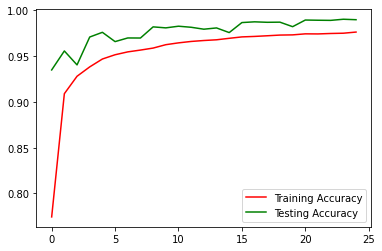

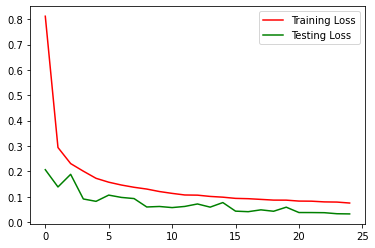

In [ ]:
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization


trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
trainGenerator = trainDataGen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")
prev = ""
labels = ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
count = 0;

validation_generator = test_datagen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')
			
model = Sequential()

#Layer1----------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(BatchNormalization())
#model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

#Layer2-------------------------------------------------------------
model.add(Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))
model.add(BatchNormalization())
#model.add(MaxPooling2D())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
#model.add(Dropout(0.25))


#Layers 3-----------------------------------------------------------	
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))


#Layer 4--------------------------------------------------
model.add(Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))			
			
#model.add(Dropout(0.2))


#Layer 5------------------------------------------------------------
'''model.add(Convolution2D(filters = 64,
			kernel_size = (2,2),
			strides= 1,
			activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))
'''

model.add(Flatten())

model.add(Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(BatchNormalization())			

model.add(Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))			
			
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
		
print(model.summary())

res=model.fit_generator(
		trainGenerator,
		epochs = 25,
		steps_per_epoch = 2444,
		validation_data = validation_generator,
		validation_steps = 432
		)

%matplotlib inline
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()
		
model.save("HindiModel2.h5")

In [ ]:
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2

''' ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]
labels =['yna', 't`aa', 't`haa', 'd`aa', 'd`haa', 'a`dna', 'ta', 'tha', 'da', 'dha', 'ka', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'kha', 'sha', 'shat', 'sa', 'ha', 'aksha', 'tra', 'gya', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
'''
labels = [u'\u091E',u'\u091F',u'\u0920',u'\u0921',u'\u0922',u'\u0923',u'\u0924',u'\u0925',u'\u0926',u'\u0927',u'\u0915',u'\u0928',u'\u092A',u'\u092B',u'\u092c',u'\u092d',u'\u092e',u'\u092f',u'\u0930',u'\u0932',u'\u0935',u'\u0916',u'\u0936',u'\u0937',u'\u0938',u'\u0939','ksha','tra','gya',u'\u0917',u'\u0918',u'\u0919',u'\u091a',u'\u091b',u'\u091c',u'\u091d',u'\u0966',u'\u0967',u'\u0968',u'\u0969',u'\u096a',u'\u096b',u'\u096c',u'\u096d',u'\u096e',u'\u096f']
#
import numpy as np
from keras.preprocessing import image
test_image = cv2.imread("/content/sample_data/dha.jpg")
image = cv2.resize(test_image, (32,32))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.expand_dims(image, axis=0)
image = np.expand_dims(image, axis=3)
print("[INFO] loading network...")
import tensorflow as tf
model = tf.keras.models.load_model("HindiModel2.h5")
lists = model.predict(image)[0]
print("The letter is ",labels[np.argmax(lists)])

[INFO] loading network...


OSError: ignored